# Basics of Deep Learning using PyTorch
PyTorch is a Python package that allows for ease of creating ML models. It has a host of functions that make creating forward prop and back prop easier

This material was taught by Python Engineer on Youtube through his free course here: https://www.youtube.com/watch?v=c36lUUr864M&t=11623s. All props to him as his course is amazing and very thorough.

In [1]:
# import the necessary packages
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

## Tensor Basics
tensors are the basic units that you work with when creatin ML models. They are like numpy arrays and represent matrices, which allow you to perform calculations very quickly with matrix math compared to creating many for-loops to run through. This section has some basic things that you can do with pytorch tensors

In [2]:
# creating some tensors for use in the following sections
x = torch.rand(5,3)
y = torch.rand(5,3)

### Some element-wise operations

In [3]:
# element-wise and in-place addition
a = torch.add(x, y)
a.add_(x)

# element-wise and in-place subtraction
b = torch.sub(x, y)
b.sub_(x)

# element-wise and in-place multiplication
c = torch.mul(x, y)
c.mul_(x)

# element-wise and in-place division
d = torch.div(x, y)
d.div_(x)

print(a)
print(b)
print(c)
print(d)

tensor([[1.2292, 1.6671, 2.0257],
        [2.2280, 1.2170, 2.5544],
        [1.9078, 1.8030, 2.2947],
        [1.0955, 2.4344, 0.9027],
        [0.9626, 0.9256, 2.3006]])
tensor([[-0.0312, -0.6167, -0.6223],
        [-0.7375, -0.4934, -0.9242],
        [-0.4919, -0.3130, -0.8621],
        [-0.6478, -0.6179, -0.3173],
        [-0.6582, -0.4536, -0.3861]])
tensor([[0.0112, 0.1701, 0.3064],
        [0.4096, 0.0646, 0.6140],
        [0.2465, 0.1737, 0.4423],
        [0.0325, 0.5097, 0.0272],
        [0.0152, 0.0253, 0.3538]])
tensor([[32.0424,  1.6215,  1.6070],
        [ 1.3559,  2.0268,  1.0821],
        [ 2.0330,  3.1952,  1.1600],
        [ 1.5438,  1.6183,  3.1511],
        [ 1.5193,  2.2047,  2.5902]])


### Slice operations

In [4]:
# using the same tensors created in the section before
print(x)      # show the entire tensor
print(x[:,1]) # gets the first column
print(x[1,:]) # gets the first row
print(x[1,1]) # gets the value at the (1,1) space

tensor([[0.5990, 0.5252, 0.7017],
        [0.7453, 0.3618, 0.8151],
        [0.7079, 0.7450, 0.7163],
        [0.2239, 0.9082, 0.2927],
        [0.1522, 0.2360, 0.9573]])
tensor([0.5252, 0.3618, 0.7450, 0.9082, 0.2360])
tensor([0.7453, 0.3618, 0.8151])
tensor(0.3618)


### Resizing tensors

In [5]:
# use the view function - the product of the dimensions must be the same
z = x.view(15, 1)
print(z)
z = y.view(-1, 5) # the -1 means 'whatever is left' - it will auto size
print(z)

tensor([[0.5990],
        [0.5252],
        [0.7017],
        [0.7453],
        [0.3618],
        [0.8151],
        [0.7079],
        [0.7450],
        [0.7163],
        [0.2239],
        [0.9082],
        [0.2927],
        [0.1522],
        [0.2360],
        [0.9573]])
tensor([[0.0312, 0.6167, 0.6223, 0.7375, 0.4934],
        [0.9242, 0.4919, 0.3130, 0.8621, 0.6478],
        [0.6179, 0.3173, 0.6582, 0.4536, 0.3861]])


### Converting from numpy ndarrays to pytorch tensors and vice-versa

In [6]:
# from tensor to ndarray
e = a.numpy() # both e and a point to the same tensor - so changing one will change the other
print(e)

# from ndarray to tensor
a = torch.from_numpy(e) # both e and a point to the same tensor - so changing one will change the other
print(a)

[[1.2291832 1.6671228 2.0256515]
 [2.2280378 1.2170306 2.5543995]
 [1.907757  1.8030319 2.2947206]
 [1.0954642 2.434426  0.9026909]
 [0.9625508 0.9256248 2.3006268]]
tensor([[1.2292, 1.6671, 2.0257],
        [2.2280, 1.2170, 2.5544],
        [1.9078, 1.8030, 2.2947],
        [1.0955, 2.4344, 0.9027],
        [0.9626, 0.9256, 2.3006]])


## Autograd
autograd is a package in pytorch that allows for automatically creating gradient descent in pytorch tensors. <br>
gradient descent and gradients are central to creating ML models because this is how you train a model. Therefore, this package is central to the pytorch <br>
<br>
When performing an operation on a tensor using autograd, pytorch creates a computation graph which automatically stores a function that is the gradient (slope) of the node. This is convenient for use during back propogation because the function is already stored rather than it needing to be calculated every time.

### Autograd features

In [7]:
x = torch.randn(3, requires_grad=True) # let the tensor know whether it can use autograd

y = x + 2        # creates a computation graph - has an attribute that is the derivative of tensor + 2
z = y * y * 2
z = z.mean()
print(z)         # the 'grad_fn' attribute is the gradient function

z.backward()     # backward propogation dcomp/dtensor - tensor has attribute that stores grad values
print(x.grad)

tensor(3.6709, grad_fn=<MeanBackward0>)
tensor([2.5158, 1.2880, 1.3419])


### Example of gradient calculation

In [8]:
# with ML models, we need to calculate gradient descent - this is a simple example using a linear function
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    modelOutput = (weights * 3).sum()       # (weights * 3) is function, .sum() creates one attr so backwards() can be called
    modelOutput.backward()
    print(weights.grad)                     # if stop here, it will calculate the change from the starting position (ones)
                                            # but, we want to calculate for each step, therefore, we reset the grads at each step
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Gradient Descent using Autograd
gradient descent is the backbone of ML models - it makes the model more accurate - this is a quick intro on using gradient descent with pytorch autograd

### Backpropogation
backpropogation is an essential step in deep learning. Here, based on the accuracy of the forward propogation step, you calculate the gradient descent and which set of parameters to test next

#### An example

In [9]:
# initialize the input and expected result
x = torch.tensor(1.0)
y = torch.tensor(2.0)

# initialize the weights
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute loss
yhat = w * x
loss = (yhat - y)**2
print(loss)

# backward pass and compute grads - computed automatically because we specified require_grad
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### Gradient Descent
In a typical ML model, you would throw all of this in a for loop and do it multiple times to make the prediction more accurate. This next portion will show that

#### Using only numpy
First, to ensure understanding of how these models work, implement using only numpy

Prediction before training: x=5, y=0.443697558796618
epoch: 1, w: 0.8685338232827611, loss: 93.14936828613281
epoch: 2, w: 1.330172006876511, loss: 32.64550018310547
epoch: 3, w: 1.6034618017983862, loss: 11.441070556640625
epoch: 4, w: 1.7652494147134252, loss: 4.00968599319458
epoch: 5, w: 1.8610276663613745, loss: 1.405250072479248
epoch: 6, w: 1.917728357584519, loss: 0.4924890398979187
epoch: 7, w: 1.9512952177834937, loss: 0.17260020971298218
epoch: 8, w: 1.9711667502236792, loss: 0.06048986315727234
epoch: 9, w: 1.9829307158303686, loss: 0.021199584007263184
epoch: 10, w: 1.9898950083566138, loss: 0.007429744116961956
epoch: 11, w: 1.9940178454232642, loss: 0.0026038270443677902
epoch: 12, w: 1.9964585588288732, loss: 0.0009125432115979493
epoch: 13, w: 1.9979034765077062, loss: 0.00031982033397071064
epoch: 14, w: 1.998758864910645, loss: 0.00011208475916646421
epoch: 15, w: 1.9992652314019628, loss: 3.927803845726885e-05
Prediction after training: x=5, y=9.996326157009815


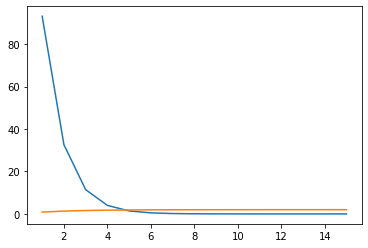

In [10]:
# linear regression so - function = weight * sample

# initialize our training samples
X = np.array([1,2,3,4,5,6,7,8], dtype=np.float32)
Y = np.array([2,4,6,8,10,12,14,16], dtype=np.float32)

# initialize our weight
w = random.random()

# calculate model prediction
def forward(x):
    return w * x

# calculate loss - mean squared error
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# calculate gradient - the derivative of the loss with respect to the weights
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

# prediction before training
print('Prediction before training: x=5, y=' + str(w*5))

# training the model
lr = 0.001
n_iters = 15
epochs = []
losses = []
weights = []
for epoch in range(1, n_iters+1):
    # forward pass
    y_pred = forward(X)

    # compute the loss
    l = loss(Y, y_pred)
    epochs.append(epoch)
    losses.append(l)

    # update the weights
    dW = gradient(X, Y, y_pred)
    w -= lr * dW
    weights.append(w)
    
    # update the epochs
    if epoch % 1 == 0:
        print(f'epoch: {epoch}, w: {w}, loss: {l}')

# print the loss
plt.plot(epochs, losses)
plt.plot(epochs, weights)

# prediction after training
print('Prediction after training: x=5, y=' + str(w*5))

#### Backprop with PyTorch
for the backward propogation

In [11]:
# linear regression so - function = weight * sample

# initialize our training samples
X = torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
Y = torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)

# initialize our weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate model prediction
def forward(x):
    return w * x

# calculate loss - mean squared error
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# prediction before training
print(f'Prediction before training: x=5, y={forward(5).item()}')

# training the model
lr = 0.01
n_iters = 20
epochs = []
losses = []
weights = []
for epoch in range(1, n_iters+1):
    # forward pass
    y_pred = forward(X)

    # compute the loss
    l = loss(Y, y_pred)
    epochs.append(epoch)
    losses.append(l.item)

    # update the weights
    l.backward()
    with torch.no_grad():
        w -= lr * w.grad

    # set the gradients to 0 again
    weights.append(w.item)
    w.grad.zero_()
    
    # update the epochs
    if epoch % 2 == 0:
        print(f'epoch: {epoch}, w: {w}, loss: {l}')

# prediction after training
print(f'Prediction after training: x=5, y={forward(5).item()}')

Prediction before training: x=5, y=0.0
epoch: 2, w: 1.5197999477386475, loss: 24.49020004272461
epoch: 4, w: 1.8847039937973022, loss: 1.4118115901947021
epoch: 6, w: 1.9723174571990967, loss: 0.0813881903886795
epoch: 8, w: 1.9933533668518066, loss: 0.004691871348768473
epoch: 10, w: 1.9984041452407837, loss: 0.0002704716462176293
epoch: 12, w: 1.9996168613433838, loss: 1.5594378055538982e-05
epoch: 14, w: 1.9999079704284668, loss: 8.987138926386251e-07
epoch: 16, w: 1.999977946281433, loss: 5.1823555224927986e-08
epoch: 18, w: 1.9999946355819702, loss: 3.004425153108059e-09
epoch: 20, w: 1.999998688697815, loss: 1.7278267705478356e-10
Prediction after training: x=5, y=9.999993324279785


#### Training Pipeline with PyTorch
Using more pytorch modules including the optimizer and loss calculation<br>
In training a model with PyTorch, use the following steps: <br>
1. design the model (input size, output size, forward pass)
2. construct the loss and optimizer
3. create the training loop 
    1. forward pass...compute the prediction
    2. backward pass...gradients
    3. update the weights...to increase accuracy

In [12]:
# a new package
import torch.nn as nn # a neural network module

# linear regression so - function = weight * sample

# initialize our training samples
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
XTest = torch.tensor([5], dtype=torch.float32)

# get the size of input
n_samples, n_features = X.size()

inputSize = n_features
outputsize = n_features

# initialize the model
model = nn.Linear(inputSize, outputsize)

# prediction before training
print(f'Prediction before training: x=5, y={model(XTest).item():.3f}')

# training the model
lr = 0.01
n_iters = 100

# define the loss and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

for epoch in range(1, n_iters+1):
    # forward pass
    y_pred = model(X)

    # compute the loss
    l = loss(Y, y_pred)

    # update the weights
    l.backward()
    optimizer.step()

    # set the gradients to 0 again
    optimizer.zero_grad()
    
    # update the epochs
    if epoch % 10 == 0:
        w, b = model.parameters()
        print(f'epoch: {epoch}, w: {w[0][0]:.3f}, loss: {l:.3f}')

# prediction after training
print(f'Prediction after training: x=5, y={forward(5).item():.3f}')

Prediction before training: x=5, y=2.543
epoch: 10, w: 1.727, loss: 0.661
epoch: 20, w: 1.914, loss: 0.021
epoch: 30, w: 1.946, loss: 0.004
epoch: 40, w: 1.952, loss: 0.003
epoch: 50, w: 1.954, loss: 0.003
epoch: 60, w: 1.956, loss: 0.003
epoch: 70, w: 1.957, loss: 0.003
epoch: 80, w: 1.958, loss: 0.003
epoch: 90, w: 1.960, loss: 0.002
epoch: 100, w: 1.961, loss: 0.002
Prediction after training: x=5, y=9.804


## Linear Regression
This should be a review of using a very simple linear regression model

#### Import the packages

In [13]:
# import the pacakges
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### Prepare the dataset

In [15]:
# generate a regression dataset
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# convert to tensors
X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape and get the input/output sizes
Y = Y.view(Y.shape[0], 1)
n_samples, n_features = X.shape

#### Generate the model

In [16]:
# get the parameters
input_size = n_features
output_size = 1

# initialize the model
model = nn.Linear(input_size, output_size)

#### Loss and Optimizer

In [18]:
# set the loss
criterion = nn.MSELoss()

# set the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Training loop

epoch: 100, loss: 332.5676, 
epoch: 200, loss: 332.5676, 
epoch: 300, loss: 332.5676, 
epoch: 400, loss: 332.5676, 
epoch: 500, loss: 332.5676, 


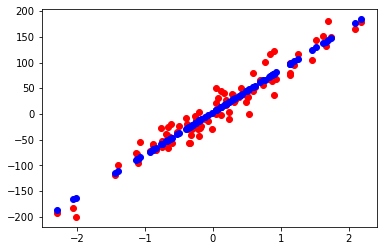

In [22]:
# set the loop
num_epochs = 500
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, Y)

    # backward pass 
    loss.backward()

    #update the weights
    optimizer.step()
    optimizer.zero_grad()

    # print some info
    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}, ')

# plot the values
predicted = model(X).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'bo')
plt.show()

## Logistic Regression
Using a new model type - but this should still be review

#### Import the packages

In [124]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Prepare the dataset

In [134]:
# load the breast cancer dataset from breast cancer dataset
bc = datasets.load_breast_cancer()

# load the input/output
X, Y = bc.data, bc.target

# get dataset size
n_samples, n_features = X.shape

# split the dataset
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

# scale the data from 0-1
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
XTest = sc.transform(Xtest)

# create tensors from the ndarrays
Xtrain = torch.from_numpy(Xtrain.astype(np.float32))
Xtest = torch.from_numpy(Xtest.astype(np.float32))
Ytrain = torch.from_numpy(Ytrain.astype(np.float32))
Ytest = torch.from_numpy(Ytest.astype(np.float32))

# reshape the Y to column vector
Ytrain = Ytrain.view(Ytrain.shape[0], 1)
Ytest = Ytest.view(Ytest.shape[0], 1)

#### Set the model

In [135]:
# there is not pre-defined class in PyTorch, so we'll need to create our own
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

# initialize the model
logreg = LogisticRegression(n_features)

#### Set the loss and optimizer

In [136]:
# set the loss
criterion = nn.BCELoss()

# set the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(logreg.parameters(), lr=learning_rate)

#### Training loop

epoch: 100, loss: 0.246405
epoch: 200, loss: 0.186896
epoch: 300, loss: 0.161085
epoch: 400, loss: 0.145664
epoch: 500, loss: 0.135096
epoch: 600, loss: 0.127279
epoch: 700, loss: 0.121203
epoch: 800, loss: 0.116313
epoch: 900, loss: 0.112273
epoch: 1000, loss: 0.108867


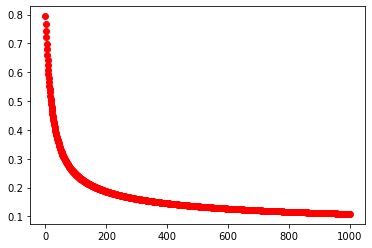

In [137]:
num_epochs = 1000
for epoch in range(num_epochs):
    
    # forward pass and loss calc
    Ypred = logreg(Xtrain)
    loss = criterion(Ypred, Ytrain)

    # backward pass
    loss.backward()

    # update params
    optimizer.step()
    optimizer.zero_grad()

    # gather some data
    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.6f}')

    plt.plot(epoch,loss.item(), 'ro')
plt.show()

#### Model evaluation

In [138]:
# this piece of code has something wrong with it, but I have no clue what it is
# when using the model - it only predicts zeros
# this is not how it should work, in fact in the cell above, it works fine when the model() function is used for forward prop
Ytestpred = logreg(Xtest)
with torch.no_grad():
    #y_predicted = logreg(Xtest) # this is the line I am referring to - it just returns all 0's and does not make a prediction
    y_predicted_cls = Ytestpred.round()
    acc = y_predicted_cls.eq(Ytest).sum() / float(Ytest.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.4035


## Dataset and Data Loader
For samples that are really large, optimizing over the entire dataset is very timely and inefficient. Instead, we want to use the DataLoader class to create batches. Then, we perform iterations over the batches so that optimization is faster.

#### Import outstanding packages

In [77]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

#### Implement our custom dataset

In [78]:
class WineDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('/Users/sakinkirti/Programming/Python/pytorch-tutorial/wine.txt', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.num_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.num_samples

#### How to use the Dataset class

In [79]:
# using the Dataset
dataset = WineDataset()
firstData = dataset[0]
features, labels = firstData
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


#### How to use the DataLoader class

In [80]:
# using the DataLoader
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.3050e+01, 3.8600e+00, 2.3200e+00, 2.2500e+01, 8.5000e+01, 1.6500e+00,
         1.5900e+00, 6.1000e-01, 1.6200e+00, 4.8000e+00, 8.4000e-01, 2.0100e+00,
         5.1500e+02],
        [1.3050e+01, 1.6500e+00, 2.5500e+00, 1.8000e+01, 9.8000e+01, 2.4500e+00,
         2.4300e+00, 2.9000e-01, 1.4400e+00, 4.2500e+00, 1.1200e+00, 2.5100e+00,
         1.1050e+03],
        [1.3290e+01, 1.9700e+00, 2.6800e+00, 1.6800e+01, 1.0200e+02, 3.0000e+00,
         3.2300e+00, 3.1000e-01, 1.6600e+00, 6.0000e+00, 1.0700e+00, 2.8400e+00,
         1.2700e+03],
        [1.2450e+01, 3.0300e+00, 2.6400e+00, 2.7000e+01, 9.7000e+01, 1.9000e+00,
         5.8000e-01, 6.3000e-01, 1.1400e+00, 7.5000e+00, 6.7000e-01, 1.7300e+00,
         8.8000e+02]]) tensor([[2.],
        [1.],
        [1.],
        [3.]])


#### A short example of how to use the classes

In [81]:
# using the dataloader in practing
num_epochs = 2
total_samples = len(dataset)
n_iters = math.ceil(total_samples / 4)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i+1) % 5 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iters}, inputs: {inputs.shape}')


epoch: 1/2, step: 5/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 10/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 15/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 20/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 25/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 30/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 35/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 40/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 45/45, inputs: torch.Size([2, 13])
epoch: 2/2, step: 5/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 10/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 15/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 20/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 25/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 30/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 35/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 40/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 45/45, inputs: torch.Size([2, 13])


## Dataset Transforms
This allows us to automatically transform a dataset when loading it from pytorch. This can be very helpful to convert images to tenors, etc <br>
Check the documentation for the full list of transforms avaialable

#### Adding to the Wine Dataset class
The dataset transforms can be done by adding to a dataset class. This is the exact class from the dataset tutorial above, which I am adding to by adding additional transforms

In [148]:
# wine dataset class with some additions
class WineDataset(Dataset):
    def __init__(self, transform=None):
        xy = np.loadtxt('/Users/sakinkirti/Programming/Python/pytorch-tutorial/wine.txt', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.num_samples = xy.shape[0]

        self.transform = transform # addition

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]

        if self.transform: # addition
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.num_samples

In [149]:
# create a ToTensor class that will convert our dataset to tensors
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        return torch.from_numpy(inputs), torch.from_numpy(labels)

In [150]:
# another transform
class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, labels = sample
        inputs *= self.factor
        return inputs, labels

In [153]:
# call the dataset
data = WineDataset(transform=None)

# get an item - this applies does not apply a transform
firstItem = data[0]
features, labels = firstItem
print(type(features), type(labels))
print(features, labels)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]


In [154]:
# here, i use the compose transform to put multiple transforms together
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
data = WineDataset(transform=composed)
firstItem = data[0]
inputs, labels = firstItem
print(type(inputs), type(labels))
print(features, labels)

<class 'torch.Tensor'> <class 'torch.Tensor'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] tensor([1.])


## Softmax and Cross Entropy
A softmax function is regularly used in multi-class classification problems. These are fairly regularly used in ML models. Cross entropy is a type of loss function that is pretty regularly in many ML models. Here is how to use them with PyTorch
<br><br>
A softmax layer outputs values at each node between 0 and 1, such that the sum of all of the values adds to 1. From here, one can filter as needed (highest value, top 5 values, least 5 values, etc).

### Softmax

#### Math behind softmax
e^y(i) / sum( e^y(j) ) <br>
This squashes the output to be between 0 and 1. They are probabilities of a particular output. The highest probability is typically the y_pred

#### Softmax function in code

In [155]:
# a function to calculate the softmax
def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

In [159]:
# a quick example using this softmax function
x = np.array([5,4,3,2,1,0])
output = softmax(x)
print(x)
print(output)

[5 4 3 2 1 0]
[0.63369132 0.23312201 0.08576079 0.03154963 0.01160646 0.00426978]


In [162]:
# calculating with pytorch
x = torch.tensor([5.0,4.0,3,2,1,0])
outputs = torch.softmax(x, dim=0)
print(x)
print(outputs)

tensor([5., 4., 3., 2., 1., 0.])
tensor([0.6337, 0.2331, 0.0858, 0.0315, 0.0116, 0.0043])


### Cross-Entropy Loss
The softmax layer is often used in conjunction with the Cross-Entropy Loss because it is used with layers that output a probability
#### Math behind CEL
(-1/N) * sum(y(i) * log(yhat(i)))

#### CEL in code

In [165]:
# create a cross-entropy loss function
def cross_entropy(y, yhat):
    return -(sum(y * np.log(yhat))) / float(yhat.shape[0])

# create the arrays
y = np.array([1,0,0])
ygood = softmax(np.array([5,4,3]))
ybad = softmax(np.array([3,5,4]))

# calculate CEL
outputg = cross_entropy(y, ygood)
outputb = cross_entropy(y, ybad)
print(f'good cross entropy loss: {output}')
print(f'bad cross entropy loss: {outputb}')

good cross entropy loss: 0.13586865481479343
bad cross entropy loss: 0.80253532148146


#### CEL with PyTorch

In [166]:
# declare the loss func
loss = torch.nn.CrossEntropyLoss()

# create the labels
y = torch.tensor([0])
ygood = torch.tensor([[2.0, 1.0, 0.1]])
ybad = torch.tensor([[0.1, 2.0, 1.1]])

# call loss func
goodL = loss(ygood, y)
badL = loss(ybad, y)

# print
print(f'good loss: {goodL.item()}')
print(f'bad loss: {badL.item()}')

good loss: 0.4170299470424652
bad loss: 2.342207193374634


In [167]:
# to get the prediction from PyTorch, use this func
_, predsg = torch.max(ygood, 1)
_, predsb = torch.max(ybad, 1)

# choose the value with the highest probability
print(f'good pred: {predsg.item()}, bad pred: {predsb.item()}')

good pred: 0, bad pred: 1


## Activation Functions with Pytorch
activtion functions allow data to travel through NN hidden layers. They apply a linear transformation to the function to decide whether the next neuron should be activated or not. These can use linear, ReLU, or some other functions. When needed, can search up what the math is. These are some different activation functions:
- linear
- sigmoid
- tanh
- ReLU
- Leaky ReLU
- softmax

There are two ways we can implement activation functions in Pytorch. One, is with nn modules that pytorch supplies. It is shown below

In [169]:
class NeuralNetStepwise:
    def __init__(self, input_size, hidden_size):
        super(NeuralNetStepwise, self).__init__()

        # the first layer, followed by its activation
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()

        # the second layer, followed by its activation
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # pass the input throught the layers
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

The second way is to use these functions directly - this can make code less cluttered

In [170]:
class NeuralNetInPlace:
    def __init__(self, input_size, hidden_size):
        super(NeuralNetInPlace, self).__init__()

        # the first layer
        self.linear1 = nn.Linear(input_size, hidden_size)
        # the second layer
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(x):
        # we do the activation in place by applying the activation function directly
        out = torch.nn.ReLU(self.linear1(x))
        out = torch.nn.Sigmoid(self.linear2(out))

## Feed Forward Net
An example of a simple neural network. This will be a multilayer multiclass model using the MNIST dataset. This dataset has handwritten numbers in which we want to NN to classify these characters are each number.

#### Import the necessary packages

In [189]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#### define hyperparameters

In [199]:
input_size = 784 # images are 28 x 28
hidden_size = 100
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

#### Import the dataset

torch.Size([100, 1, 28, 28]) torch.Size([100])


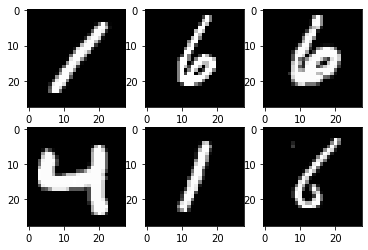

In [200]:
# get the datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# use a dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# look at one set
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

# show some data
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

#### Define our NN

In [201]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Network, self).__init__()

        # create the layers
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

# instantiate the model
model = Network(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

#### Define the loss and optimizer

In [202]:
# loss
loss = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### Training loop

In [203]:
n_total_steps = len(train_loader)

# loop over epochs
for epoch in range(num_epochs):
    # loop over minibatches
    for i,(images,labels) in enumerate(train_loader):

        # reshape the images to column vectors - currently they are 100,1,28,28 while input size is 100,784
        images = images.reshape(-1, 28*28)

        # forward prop
        y_pred = model(images)
        l = loss(y_pred, labels)

        # back prop
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        # print some data
        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_total_steps}, loss: {l.item():.5f}')

epoch: 1/3, step: 100/600, loss: 0.49884
epoch: 1/3, step: 200/600, loss: 0.28134
epoch: 1/3, step: 300/600, loss: 0.27290
epoch: 1/3, step: 400/600, loss: 0.33269
epoch: 1/3, step: 500/600, loss: 0.28581
epoch: 1/3, step: 600/600, loss: 0.14551
epoch: 2/3, step: 100/600, loss: 0.24196
epoch: 2/3, step: 200/600, loss: 0.27990
epoch: 2/3, step: 300/600, loss: 0.25892
epoch: 2/3, step: 400/600, loss: 0.10054
epoch: 2/3, step: 500/600, loss: 0.16690
epoch: 2/3, step: 600/600, loss: 0.19865
epoch: 3/3, step: 100/600, loss: 0.09282
epoch: 3/3, step: 200/600, loss: 0.20492
epoch: 3/3, step: 300/600, loss: 0.16794
epoch: 3/3, step: 400/600, loss: 0.16112
epoch: 3/3, step: 500/600, loss: 0.14187
epoch: 3/3, step: 600/600, loss: 0.08895


#### Testing and evaluation

In [204]:
# get the accuracy of the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy: {acc}')

Accuracy: 0.9624
